In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:1100% !important; }</style>"))

In [6]:
df=pd.read_csv("yoga_poses_dataset_updated.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113308 entries, 0 to 113307
Columns: 133 entries, NOSE_x to target
dtypes: float64(132), object(1)
memory usage: 115.0+ MB


In [8]:
df.head()

,NOSE_x,NOSE_y,NOSE_z,NOSE_visiblity,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visiblity,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_visiblity,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_visiblity,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_visiblity,target
0,0.432962,0.586089,-0.162905,0.999993,0.437066,0.577206,-0.153582,0.999997,0.439082,0.577156,...,0.515850,0.381850,0.806586,-0.196454,0.835234,0.473708,0.793803,-0.159873,0.688180,Padam
1,0.492706,0.326348,-0.332448,0.999912,0.495855,0.314325,-0.318994,0.999875,0.498365,0.313914,...,0.861519,0.510008,0.840292,0.102862,0.974137,0.477145,0.838038,0.135978,0.971032,Tad
2,0.537991,0.324800,-0.189326,0.999641,0.542028,0.311678,-0.172213,0.999432,0.544572,0.311648,...,0.936071,0.542404,0.741209,0.087022,0.911284,0.543808,0.907746,0.009764,0.978974,Vriksh
3,0.524368,0.595201,0.014085,0.999924,0.519550,0.590234,0.027053,0.999872,0.518649,0.590620,...,0.991245,0.279704,0.790883,0.035683,0.769655,0.269997,0.816778,-0.123283,0.984746,bhujan
4,0.556475,0.590921,-0.216842,0.999965,0.559876,0.580551,-0.207372,0.999977,0.561862,0.580936,...,0.541882,0.505391,0.800486,-0.158383,0.651518,0.589267,0.812266,-0.175917,0.639140,Padam


In [9]:
df.target.value_counts()

Vriksh         16910
Bhuj           13830
Padam          12693
Shav           12289
Trik           12147
vriksh          5311
Tad             4978
Tadasan         4366
Tada            4084
padam           2667
Trikon          2644
tadasan         2513
padmasan        2511
bhuj            1897
Trikonasana     1602
Tadasna         1548
Bhu             1489
Shavasana       1391
tadasna         1297
Tadasana        1291
bhujan          1197
trikon          1179
bhujang         1175
shav             937
Bhuj2            932
savasan          430
Name: target, dtype: int64

In [10]:
def change_target(val):
    if(val[0:3].lower()=='tri'):
        return "trikonasana"
    elif (val[0:3].lower()=='vri'):
        return "vrikashasana"
    elif (val[0:3].lower()=='pad'):
        return "padamasana"
    elif (val[0:3].lower()=='sha'):
        return "shavasana"
    elif (val[0:3].lower()=='bhu'):
        return "bhujangasana"
    else:
        return "tadasana"





In [11]:
df["target"]=df["target"].apply(change_target)

In [12]:
df["target"].value_counts()

vrikashasana    22221
bhujangasana    20520
tadasana        20507
padamasana      17871
trikonasana     17572
shavasana       14617
Name: target, dtype: int64

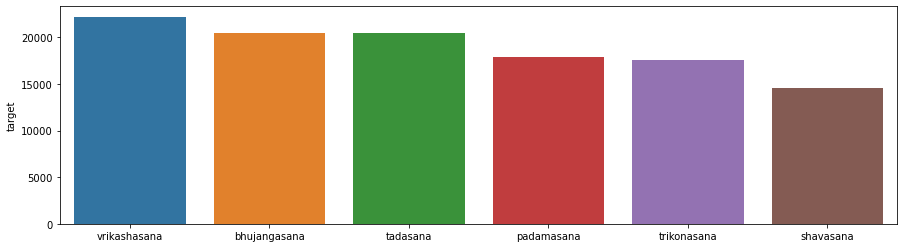

In [13]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df.target.value_counts().index, y=df.target.value_counts(),ax=ax)

In [22]:
df.to_csv('final_dataset.csv')

In [14]:
import math

In [83]:
def calculate_angle(A,B):
    unit_A=A/np.linalg.norm(A)
    unit_B=B/np.linalg.norm(B)

    return np.arccos(np.dot(unit_A,unit_B))

print(calculate_angle([-48.5,0,-1],[-1,-8,0]))


def joint_angle(df):
    chest_vector=np.transpose(np.array([df['LEFT_SHOULDER_x']-df['RIGHT_SHOULDER_x'],df['LEFT_SHOULDER_y']-df['RIGHT_SHOULDER_y'],df['LEFT_SHOULDER_z']-df['RIGHT_SHOULDER_z']]))
    left_upper_arm_vector=np.transpose(np.array([df['LEFT_ELBOW_x']-df['LEFT_SHOULDER_x'],df['LEFT_ELBOW_y']-df['LEFT_SHOULDER_y'],df['LEFT_ELBOW_z']-df['LEFT_SHOULDER_z']]))
    right_upper_arm_vector=np.transpose(np.array([df['RIGHT_ELBOW_x']-df['RIGHT_SHOULDER_x'],df['RIGHT_ELBOW_y']-df['RIGHT_SHOULDER_y'],df['RIGHT_ELBOW_z']-df['RIGHT_SHOULDER_z']]))
    left_lower_arm_vector=np.transpose(np.array([df['LEFT_WRIST_x']-df['LEFT_ELBOW_x'],df['LEFT_WRIST_y']-df['LEFT_ELBOW_y'],df['LEFT_WRIST_z']-df['LEFT_ELBOW_z']]))
    right_lower_arm_vector=np.transpose(np.array([df['RIGHT_WRIST_x']-df['RIGHT_ELBOW_x'],df['RIGHT_WRIST_y']-df['RIGHT_ELBOW_y'],df['RIGHT_WRIST_z']-df['RIGHT_ELBOW_z']]))
    lowerbody_vector=np.transpose(np.array([df['LEFT_HIP_x']-df['RIGHT_HIP_x'],df['LEFT_HIP_y']-df['RIGHT_HIP_y'],df['LEFT_HIP_z']-df['RIGHT_HIP_z']]))
    left_upper_foot_vector=np.transpose(np.array([df['LEFT_KNEE_x']-df['LEFT_HIP_x'],df['LEFT_KNEE_y']-df['LEFT_HIP_y'],df['LEFT_KNEE_z']-df['LEFT_HIP_z']]))
    right_upper_foot_vector=np.transpose(np.array([df['RIGHT_KNEE_x']-df['RIGHT_HIP_x'],df['RIGHT_KNEE_y']-df['RIGHT_HIP_y'],df['RIGHT_KNEE_z']-df['RIGHT_HIP_z']]))
    left_lower_foot_vector=np.transpose(np.array([df['LEFT_ANKLE_x']-df['LEFT_KNEE_x'],df['LEFT_ANKLE_y']-df['LEFT_KNEE_y'],df['LEFT_ANKLE_z']-df['LEFT_KNEE_z']]))
    right_lower_foot_vector=np.transpose(np.array([df['RIGHT_ANKLE_x']-df['RIGHT_KNEE_x'],df['RIGHT_ANKLE_y']-df['RIGHT_KNEE_y'],df['RIGHT_ANKLE_z']-df['RIGHT_KNEE_z']]))
    mouth_vector=np.transpose(np.array([df['MOUTH_LEFT_x']-df['MOUTH_RIGHT_x'],df['MOUTH_LEFT_y']-df['MOUTH_RIGHT_y'],df['MOUTH_LEFT_z']-df['MOUTH_RIGHT_z']]))
    
    
    df['head_angle']=([calculate_angle(mouth_vector[i],(chest_vector[i])) for i in range(len(mouth_vector))])
    df['left_shoulder_angle']=([calculate_angle(chest_vector[i],(left_upper_arm_vector[i])) for i in range(len(chest_vector))])
    df['right_shoulder_angle']=([calculate_angle(chest_vector[i],(right_upper_arm_vector[i])) for i in range(len(chest_vector))])
    df['left_elbow_angle']=([calculate_angle(left_upper_arm_vector[i],(left_lower_arm_vector[i])) for i in range(len(left_upper_arm_vector))])
    df['right_elbow_angle']=([calculate_angle(right_upper_arm_vector[i],(right_lower_arm_vector[i])) for i in range(len(right_upper_arm_vector))])
    df['body_angle']=([calculate_angle(chest_vector[i],(lowerbody_vector[i])) for i in range(len(chest_vector))])
    df['left_upper_leg_angle']=([calculate_angle(lowerbody_vector[i],(left_upper_foot_vector[i])) for i in range(len(lowerbody_vector))])
    df['right_upper_leg_angle']=([calculate_angle(lowerbody_vector[i],(right_upper_foot_vector[i]))for i in range(len(lowerbody_vector))])
    df['left_lower_leg_angle']=([calculate_angle(left_upper_foot_vector[i],(left_lower_foot_vector[i])) for i in range(len(left_upper_foot_vector))])
    df['right_lower_leg_angle']=([calculate_angle(right_upper_foot_vector[i],(right_lower_foot_vector[i])) for i in range(len(right_upper_foot_vector))])
    df['body_angle_two']=([calculate_angle(mouth_vector[i],(lowerbody_vector[i])) for i in range(len(lowerbody_vector))])

1.4464678940402966


In [84]:
joint_angle(df)

In [85]:
df.head()

,NOSE_x,NOSE_y,NOSE_z,NOSE_visiblity,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visiblity,LEFT_EYE_x,LEFT_EYE_y,...,left_shoulder_angle,right_shoulder_angle,left_elbow_angle,right_elbow_angle,body_angle,left_upper_leg_angle,right_upper_leg_angle,left_lower_leg_angle,right_lower_leg_angle,body_angle_two
0,0.432962,0.586089,-0.162905,0.999993,0.437066,0.577206,-0.153582,0.999997,0.439082,0.577156,...,1.407039,1.754468,0.604075,0.691747,0.226549,1.258616,1.596289,2.202502,2.273248,0.341441
1,0.492706,0.326348,-0.332448,0.999912,0.495855,0.314325,-0.318994,0.999875,0.498365,0.313914,...,1.506347,1.568883,0.170285,0.172404,0.244720,1.711940,1.656902,0.577618,0.483893,0.293884
2,0.537991,0.324800,-0.189326,0.999641,0.542028,0.311678,-0.172213,0.999432,0.544572,0.311648,...,1.928070,2.134473,1.028227,1.096166,0.429919,2.249010,1.797972,2.449074,0.908375,0.600287
3,0.524368,0.595201,0.014085,0.999924,0.519550,0.590234,0.027053,0.999872,0.518649,0.590620,...,1.353771,1.927445,0.928586,0.307187,0.095035,1.888597,1.727355,0.824582,0.536957,0.121358
4,0.556475,0.590921,-0.216842,0.999965,0.559876,0.580551,-0.207372,0.999977,0.561862,0.580936,...,1.270621,1.692018,0.714491,0.678520,0.142492,1.511483,1.810099,2.549678,2.455310,0.251515


In [86]:
df.to_csv("new_final_dataset.csv")